# Notebook ICD - 18.19

### Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from numpy import mean
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Dataset

**Context**. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content**. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [3]:
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X)

## Baseline model

https://scikit-learn.org/stable/modules/cross_validation.html

In [6]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [7]:
clf_nb = GaussianNB()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_nb.fit(X_train, y_train)
    y_pred = clf_nb.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7699825630206876, 0.710195463049429, 0.8051948051948052, 0.7390952033208712, 0.8023022094980975]
0.7653540488167782


## Decision Tree models

### Deep tree

In [8]:
clf_ddt = DecisionTreeClassifier()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ddt.fit(X_train, y_train)
    y_pred = clf_ddt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.6950949050949051, 0.7174071488539876, 0.7422593190996118, 0.7105107282098433, 0.7662337662337663]
0.7263011734984228


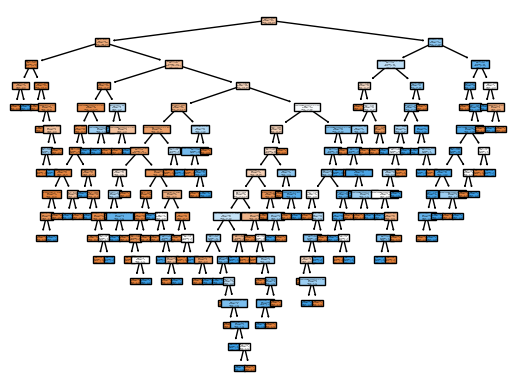

In [9]:
fig = tree.plot_tree(clf_ddt,
                     feature_names = df.columns,
                     class_names = ['False','True'],
                     filled=True)

### Shallow tree

In [10]:
clf_sdt = DecisionTreeClassifier(max_depth=2)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_sdt.fit(X_train, y_train)
    y_pred = clf_sdt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.8033584062995828, 0.7052272250510135, 0.7951292023612299, 0.7193267561931156, 0.7170686456400742]
0.7480220471090032


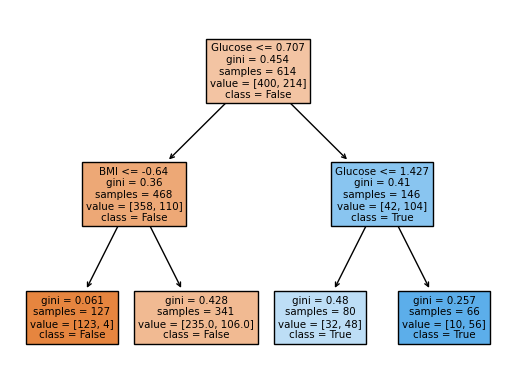

In [11]:
fig = tree.plot_tree(clf_sdt,
                     feature_names = df.columns,
                     class_names = ['False','True'],
                     filled=True)

## Adaboost

The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

Remember: Shallow trees have less variance but higher bias and then will be better choice for sequential methods. 

In [12]:
clf_ab = AdaBoostClassifier(n_estimators=15, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_ab.fit(X_train, y_train)
    y_pred = clf_ab.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7902489667195549, 0.7198515769944341, 0.7792207792207793, 0.7115923292393881, 0.7910711477798209]
0.7583969599907954


/home/miguel/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/miguel/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/miguel/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/miguel/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

## Random Forest

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, max_features=n_features and bootstrap=False, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

Remember: Deep trees have low bias but high variance and, so, are relevant choices for bagging.

In [13]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[0.7998939835674529, 0.7313771134525852, 0.8083466731766346, 0.7554767899150163, 0.801148851148851]
0.779248682252108
